# **Milestone 1**

## **Perkenalan**

**Halo!**

Saya **Zidny Yasrah Sallum**, student di hacktiv8 batch RMT-20. Dimilestone pertama ini saya akan menganalisa dataset tentang pokemon yang diambil dari kaggle berjudul "The Complete Pokemon Dataset", diupload oleh Rounak Banik yaitu dataset yang berisi sekitar 800 data dari berbagai macam pokemon generasi pertama sampai ke tujuh. Dataset ini berisi data seperti nama pokemonnya, attack, HP, generasi, berat dan sebagainya.

Link Dashboard : https://lookerstudio.google.com/reporting/bcf63884-daaf-4eb9-81f1-1cb1f6457a7b

**" Gotta catch em' all! "**


## **Identifikasi Masalah**

### **Overview**
> Pokémon (ポケモン), adalah salah satu waralaba media yang dimiliki oleh perusahaan permainan video Nintendo dan diciptakan oleh Satoshi Tajiri pada 1995. Pada mulanya, Pokémon adalah seri permainan video yang identik dengan konsol Game Boy. Pokémon merupakan permainan video tersukses kedua di dunia setelah serial Mario yang juga diciptakan oleh Nintendo.  Waralaba Pokémon sendiri muncul dalam beragam bentuk, yaitu permainan video, anime, manga, trading cards, buku, mainan, dan masih banyak lagi.. _(source : https://id.wikipedia.org/wiki/Pok%C3%A9mon)_

### **Latar Belakang**
> Saya adalah seorang data analyst yang mendapatkan seorang client yang berprofesi sebagai trainer pokemon professional. Dia sudah memiliki pengalaman bertahun-tahun, namun selama karirnya dia masih sering mengalami kekalahan ketika bertanding. Ingin lepas dari kekalahan itu, dia meminta saya untuk menganalisis berbagai jenis pokemon untuk mencari tau pokemon terbaik dalam segala aspek yang bisa dia gunakan untuk memenangkan segala pertandingan.

### **Problem Statement**
> Menganalisa pokemon terbaik yang diukur dari base statnya di game pokemon dari generasi pertama(1996) sampai generasi ketujuh(2016)

### **Penjabaran Masalah**
> * Berapa jumlah pokemon dari tiap generasi?
* Jumlah pokemon berdasarkan tipenya
* Perbedaan single type dan dual type pokemon
* Pokemon yang paling mudah dan paling sulit untuk ditangkap
* central tendency dari masing-masing tipe pokemon berdasarkan overall statnya
* Perbandingan jumlah pokemon legendary dengan yang non-legendary
* Apakah ada pokemon non-legendary yang lebih kuat dari pokemon legendary?
* hipotesis testing : apakah semua pokemon legendary memiliki rata-rata overall base stat yang lebih tinggi dari pokemon biasa?
* Bagaimana korelasi antara capture_rate dari pokemon terhadap overall base statnya?


## **Import Libraries**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from math import sqrt

## **Data Loading**

link dataset : https://www.kaggle.com/datasets/rounakbanik/pokemon



Dikarenakan banyaknya kolom pada dataset, saya harus memfilter dulu kolom yang saya butuhkan, berikut query yang saya gunakan di bigquery

```
SELECT
      name, abilities, classfication, type1, type2, attack, hp, defense, speed, weight_kg,
      height_m, generation, base_happiness, capture_rate, experience_growth, pokedex_number,
      sp_attack, sp_defense, is_legendary
FROM
      `hacktiv8-zidny.pokemon.pokemon_data`
```
Output dari querynya saya export ke local dan diupload ke github repository

In [37]:
# Saya menyimpan file csv ke repo github saya sendiri agar bisa diimport dengan mudah
url = 'https://raw.githubusercontent.com/zidnyyasrah/milestone/main/filtered_pokemon_data.csv'
df = pd.read_csv(url)

In [38]:
# Menampilkan 5 baris pertama dari dataset
df.head()

,name,abilities,classfication,type1,type2,attack,hp,defense,speed,weight_kg,height_m,generation,base_happiness,capture_rate,experience_growth,pokedex_number,sp_attack,sp_defense,is_legendary
0,Tornadus,"['Prankster', 'Defiant', 'Regenerator']",Cyclone Pokémon,flying,NaN,100,79,80,121,63.0,1.5,5,90,3,1250000,641,110,90,1
1,Caterpie,"['Shield Dust', 'Run Away']",Worm Pokémon,bug,NaN,30,45,35,45,2.9,0.3,1,70,255,1000000,10,20,20,0
2,Metapod,['Shed Skin'],Cocoon Pokémon,bug,NaN,20,50,55,30,9.9,0.7,1,70,120,1000000,11,25,25,0
3,Pinsir,"['Hyper Cutter', 'Mold Breaker', 'Moxie']",Stagbeetle Pokémon,bug,NaN,155,65,120,105,55.0,1.5,1,70,45,1250000,127,65,90,0
4,Pineco,"['Sturdy', 'Overcoat']",Bagworm Pokémon,bug,NaN,65,50,90,15,7.2,0.6,2,70,190,1000000,204,35,35,0


In [39]:
# Menampilkan 5 baris terakhir dari dataset
df.tail()

,name,abilities,classfication,type1,type2,attack,hp,defense,speed,weight_kg,height_m,generation,base_happiness,capture_rate,experience_growth,pokedex_number,sp_attack,sp_defense,is_legendary
796,Stufful,"['Fluffy', 'Klutz', 'Cute Charm']",Flailing Pokémon,normal,fighting,75,70,50,50,6.8,0.5,7,70,140,1000000,759,45,50,0
797,Bewear,"['Fluffy', 'Klutz', 'Unnerve']",Strong Arm Pokémon,normal,fighting,125,120,80,60,135.0,2.1,7,70,70,1000000,760,55,60,0
798,Croagunk,"['Anticipation', 'Dry Skin', 'Poison Touch']",Toxic Mouth Pokémon,poison,fighting,61,48,40,50,23.0,0.7,4,100,140,1000000,453,61,40,0
799,Toxicroak,"['Anticipation', 'Dry Skin', 'Poison Touch']",Toxic Mouth Pokémon,poison,fighting,106,83,65,85,44.4,1.3,4,70,75,1000000,454,86,65,0
800,Gallade,"['Steadfast', 'Justified']",Blade Pokémon,psychic,fighting,165,68,95,110,52.0,1.6,4,35,45,1250000,475,65,115,0


In [40]:
# Melihat generasi pokemon yang ada dataframe
print(df['generation'].unique())

[5 1 2 3 4 6 7]


### **Penjelasan kolom**



Nama Kolom | Penjelasan
--- | ---
`name` | Nama dari pokemon
`abilities` | list kemampuan dari pokemon
`classification` | Klasifikasi dari pokemon
`type1` | jenis utama Pokemon
`type2` | jenis kedua Pokemon
`attack` | Base attack dari pokemon
`hp` | Base HP atau hitpoints dari pokemon
`defense` | Base defense dari pokemon
`speed` | Base speed dari pokemon
`weight_kg` | berat pokemon dalam kilogram
`height_m` | tinggi pokemon dalam meter
`generation` | generasi pokemon pertama kali muncul
`base_happiness` | Base happines dari pokemon
`capture_rate` | Tingkat kesulitan untuk mendapatkan pokemon (%)
`experience_growth` | Experience Growth dari Pokemon
`pokedex_number` | nomor dari Pokemon di National Pokedex
`sp_attack` | Base special attack pokemon
`sp_defense` | Base special defense pokemon
`is_legendary` | Status legendary pokemon (Jika 0 = non-legendary dan 1 = legendary)

## **Data Cleaning**

Selanjutnya saya ingin melihat berbagai jenis kolom-kolom yang ada pada dataframe

In [41]:
# Melihat informasi pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   classfication      801 non-null    object 
 3   type1              801 non-null    object 
 4   type2              417 non-null    object 
 5   attack             801 non-null    int64  
 6   hp                 801 non-null    int64  
 7   defense            801 non-null    int64  
 8   speed              801 non-null    int64  
 9   weight_kg          781 non-null    float64
 10  height_m           781 non-null    float64
 11  generation         801 non-null    int64  
 12  base_happiness     801 non-null    int64  
 13  capture_rate       801 non-null    object 
 14  experience_growth  801 non-null    int64  
 15  pokedex_number     801 non-null    int64  
 16  sp_attack          801 non

whoa, Walaupun sudah saya filter menggunakan sql sebelumnya, kolomnya masih yang sangat banyak. Sebaiknya saya drop beberapa kolom lagi yaitu pokedex_number, weight_kg, height_m, dan experience_growth karena tidak berkaitan dengan problem statement saya.

In [42]:
# Menghapus kolom pokedex_number
df = df.drop(['pokedex_number','weight_kg','height_m','experience_growth'], axis = 1)

ada yang menganggu saya ketika melihat tipe data diatas. Pada kolom capture rate, tipe datanya adalah object.

Capture rate menunjukkan tingkat kesulitan dalam menangkap pokemon. Semakin besar nilai capture rate maka akan semakin mudah untuk menangkap pokemon dan sebaliknya semakin kecil nilai capture rate maka akan semakin sulit untuk mendapatkannya. Jadi kolom tersebut seharusnya menggunakan tipe data numerik seperti integer atau float. Saya akan mengganti tipe datanya menjadi tipe data numerik, namun sebelum itu saya akan lihat terlebih dahulu unique values dari kolom tersebut

In [43]:
# Melihat unique values dari kolom capture_rate
df['capture_rate'].unique()

array(['3', '255', '120', '45', '190', '150', '200', '75', '60', '25',
       '55', '127', '30', '90', '65', '225', '140', '235', '130', '125',
       '205', '35', '50', '160', '100', '180', '220', '155', '15', '170',
       '145', '70', '30 (Meteorite)255 (Core)', '80'], dtype=object)

Hmm terlihat pada list diatas, ada value berisi '30 (Meteorite)255 (Core)' yang jelas bukan nilai numerik, saya akan ubah saja value tersebut menjadi 30 dan setelah itu mengubah tipe data kolomnya menjadi integer. (Saya tidak mengubahnya menjadi float dikarenakan saya tidak melihat ada angka desimal di unique value diatas)

In [44]:
# Mengganti value '30 (Meteorite)255 (Core)' menjadi '30'
df["capture_rate"].replace({'30 (Meteorite)255 (Core)': '30'}, inplace=True)

# Mengubah tipe data dari kolom capture_rate menjadi integer
df['capture_rate'] = df['capture_rate'].astype('int')

# Menampilkan tipe data dari kolom capture_rate
df['capture_rate'].dtype

dtype('int64')

Sudah berhasil, untuk sekarang saya akan lihat apakah ada null values pada data

In [45]:
# Melihat jumlah null values dari dataframe
df.isnull().sum()

name                0
abilities           0
classfication       0
type1               0
type2             384
attack              0
hp                  0
defense             0
speed               0
generation          0
base_happiness      0
capture_rate        0
sp_attack           0
sp_defense          0
is_legendary        0
dtype: int64

Untuk kolom type 2 terdapat null values dikarenakan memang tidak semua pokemon bersifat atau memiliki dua jenis (dual type) maka saya akan fill data yang null dengan 'none'.

In [46]:
# fill data yang null di kolom type2 dengan value 'none'
df['type2'].fillna('none', inplace = True)

In [47]:
# Melihat apakah masih ada null values pada dataframe
df.isnull().values.any()

False

Sudah tidak ada missing values.

## **Exploratory Data Analysis**

Untuk yang pertama, saya ingin tau dulu ada berapa jumlah pokemon pada dataframe

In [48]:
# Melihat jumlah baris dan kolom
df.shape

(801, 15)

ada sebanyak 801 pokemon, itu adalah angka yang banyak, saya jadi penasaran pembagian dari **jumlah pokemonnnya di tiap generasi**

[Text(0.5, 0, 'Generasi'), Text(0, 0.5, 'Jumlah Pokemon')]

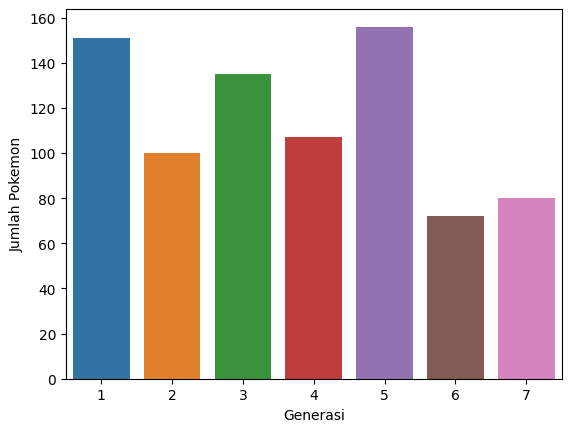

In [49]:
# Menggunakan countplot untuk melihat jumlah pokemon dari tiap generasi
sns.countplot(x=df['generation']).set(xlabel='Generasi', ylabel='Jumlah Pokemon')

Ada pattern yang terlihat pada plot diatas, generasi dengan angka ganjil cenderung lebih tinggi dari generasi setelahnya(genap), pada generasi pertama jumlah pokemon lebih tinggi dari generasi ke2, generasi ke3 lebih tinggi dari ke4 dan seterusnya.
* Generasi ke-5 memiliki jumlah pokemon terbanyak, sedangkan generasi ke-6 memiliki jumlah pokemon paling sedikit


Setelah melihat pembagian pokemon berdasarkan generasi, sekarang saya akan melihat **Jumlah pokemon berdasarkan tipe utamanya.**

Apa maksud dari tipe pokemon?

Dalam dunia Pokemon, "tipe" mengacu pada klasifikasi elemen atau sifat yang dimiliki oleh setiap Pokemon. Setiap Pokemon memiliki satu (single-type) atau dua tipe (dual-type) yang mempengaruhi kekuatan, kelemahan, dan resistensi mereka terhadap serangan dan kondisi tertentu.


[Text(0.5, 0, 'Jumlah Pokemon'), Text(0, 0.5, 'Tipe Utama Pokemon')]

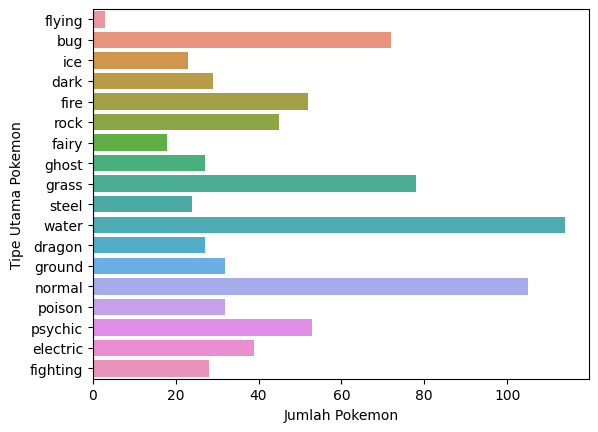

In [50]:
# Menggunakan countplot untuk melihat jumlah dari tiap tipe utama
sns.countplot(data=df, y=df['type1']).set(xlabel='Jumlah Pokemon', ylabel='Tipe Utama Pokemon')

Tipe pokemon _"water"_ menduduki peringkat teratas yang menunjukkan banyaknya tipe _"water"_ pokemon dan disusul oleh pokemon bertipe _"normal"_. Sedangkan yang paling rendah adalah pokemon bertipe _"flying"_.

Bagaimana dengan tipe kedua dari pokemon?

[Text(0.5, 0, 'Jumlah Pokemon'), Text(0, 0.5, 'Tipe Kedua Pokemon')]

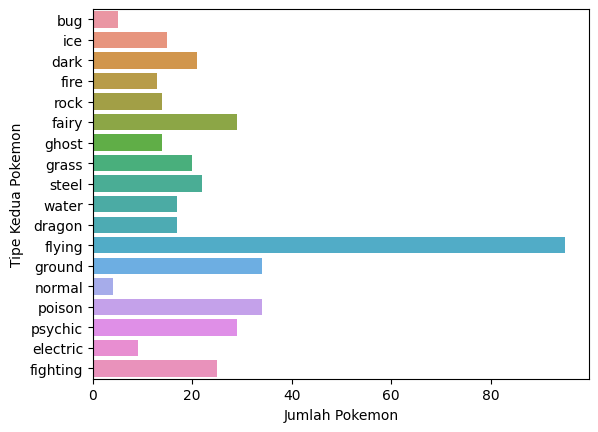

In [51]:
# mengclone dataframe ke dataframe baru
tipe2 = df.copy()

# drop value none di tipe 2 pada dataframe yang sudah diclone agar tidak mempengaruhi dataframe aslinya
tipe2.drop(tipe2.index[tipe2['type2'] == 'none'], inplace = True)

# Melihat jumlah pokemon dengan secondary typenya
sns.countplot(data=tipe2, y=tipe2['type2']).set(xlabel='Jumlah Pokemon', ylabel='Tipe Kedua Pokemon')

Tadi di tipe utama, _"flying"_ merupakan tipe terendah, ternyata tipe ini lebih sering dijumpai di tipe kedua (dual-type pokemon)

masih di topik jumlah, sekarang saya ingin lihat **perbedaan jumlah single type dan dual type pokemon**

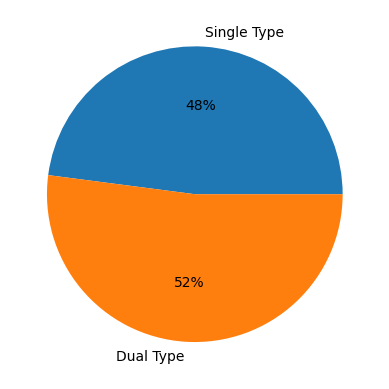

In [52]:
# Menghitung jumlah single type dan dual type pokemon.
single_type = df['type2'].value_counts()['none']
dual_type = tipe2['type2'].count()

# Konfigurasi chart
keys = ['Single Type', 'Dual Type']
data = [single_type,dual_type]

# membuat pie chart
plt.pie(data, labels=keys,autopct='%.0f%%')

# menampilkan chart
plt.show()

ternyata pembagian jumlah single type dan dual type pokemon hampir sama banyak.

Bagaimana dengan **pokemon yang paling mudah dan sulit untuk ditangkap**

[Text(0.5, 0, 'Tipe Pokemon'), Text(0, 0.5, 'Capture Rate')]

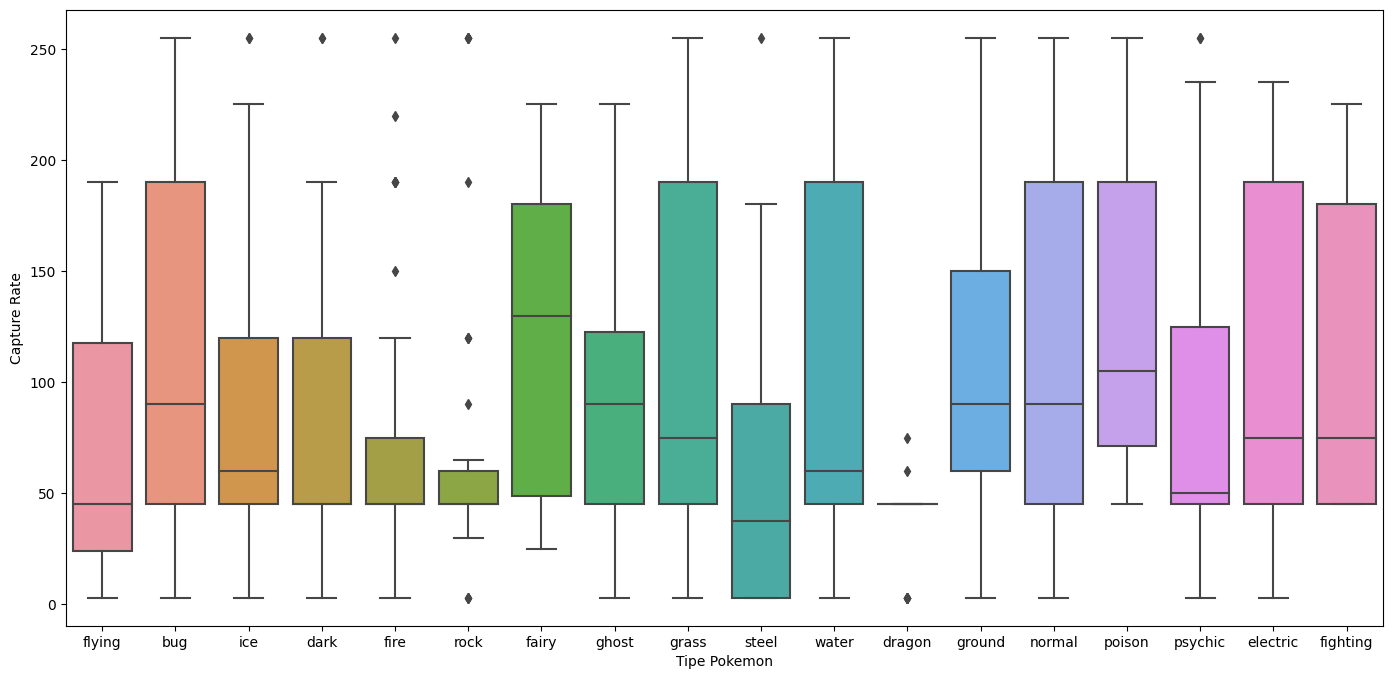

In [53]:
# Mengatur ukuran plotnya
plt.figure(figsize=(17,8))

# Membuat boxplot dengan sumbu x sebagai primary type dan y capture ratenya
sns.boxplot(data=df, x="type1", y="capture_rate").set(xlabel='Tipe Pokemon', ylabel='Capture Rate')

Seperti yang sudah saya jelaskan diawal, makin tinggi capture rate maka makin mudah pokemon didapatkan, sebaliknya  makin rendah capture rate maka akan semakin sulit pokemon untuk didapat.
* Tipe _"dragon"_ adalah tipe pokemon yang paling sulit untuk ditangkap, disusul dengan tipe _"steel"_ dan _"rock"_
* Tipe _"fairy"_ memiliki nilai median paling tinggi, menunjukkan bahwa pokemon bertipe _"fairy"_ relatif mudah untuk ditangkap


Bagaimana jika melihat dari individu pokemonnya?

In [54]:
# Mengambil baris yang memiliki nilai minimum dari kolom capture_rate
min = df['capture_rate'].idxmin()
rate_min = df.loc[min]

# Mengambil baris yang memiliki nilai maksimum dari kolom capture_rate
max = df['capture_rate'].idxmax()
rate_max = df.loc[max]

# Menampilkan hasil
print(f'Pokemon yang paling mudah ditangkap adalah {rate_max[0]} bertipe {rate_max[3]} dengan capture rate sebesar {rate_max[11]}%')
print(f'Pokemon yang paling sulit ditangkap adalah {rate_min[0]} bertipe {rate_min[3]} dengan capture rate hanya {rate_min[11]}%')

Pokemon yang paling mudah ditangkap adalah Caterpie bertipe bug dengan capture rate sebesar 255%
Pokemon yang paling sulit ditangkap adalah Tornadus bertipe flying dengan capture rate hanya 3%


Jika tadi berdasarkan capture ratenya, sekarang saya ingin lihat **central tendency dari masing-masing tipe berdasarkan overall_statnya**,

Overall stat adalah kolom baru yang akan saya buat untuk menampung gabungan beberapa base stat yang meliputi attack, hp, defense, speed, sp_attack, dan sp_defense. Tujuannya sebagai parameter penentu untuk membandingkan total stat dari pokemon.


In [55]:
# Membuat kolom baru yang merupakan gabungan dari seluruh base stat
df['overall_stat'] = df['attack'] + df['defense'] + df['hp'] + df['speed'] + df['sp_attack'] + df['sp_defense']

# Melihat mode, mean dan median dari overall_stat yang dikategorikan berdasarkan tipe pokemon
tendency = df.groupby('type1')['overall_stat'].apply(lambda x: pd.Series([x.mode().iloc[0], x.mean().round(2), x.median()])).unstack()

# Membuat nama kolom baru untuk nilai mode mean dan median
tendency.columns = ['Mode', 'Mean', 'Median']
tendency

,Mode,Mean,Median
type1,,,
bug,205.0,380.43,392.5
dark,510.0,449.76,480.0
dragon,300.0,522.78,540.0
electric,405.0,436.15,435.0
fairy,341.0,427.17,456.0
fighting,455.0,414.82,455.0
fire,405.0,450.63,473.0
flying,245.0,453.33,535.0
ghost,295.0,434.70,474.0


* Tipe _"bug"_ memiliki nilai mode, mean, median terendah menunjukkan kebanyakan pokemon tipe bug memiliki overall stat yang relatif kecil
* Tipe _"dragon"_ memiliki nilai mean dan nilai median tertinggi, menunjukkan rata-rata pokemon tersebut memiliki overall_stat yang relatif tinggi


Sekarang saya akan lihat **perbandingan dari jumlah pokemon legendary dan pokemon biasa**

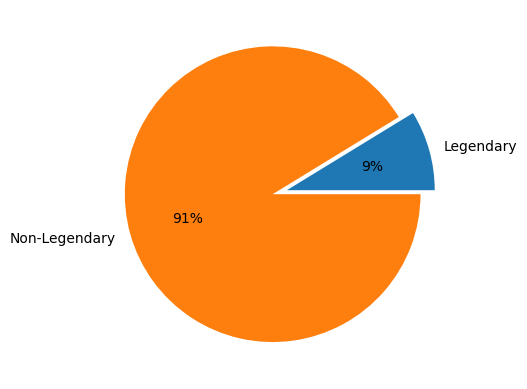

In [56]:
# Memfilter data untuk mengambil baris yang merupakan pokemon legendary dan yang bukan
legend = df['is_legendary'].value_counts()[1]
non_legend = df['is_legendary'].value_counts()[0]

# Konfigurasi untuk pie chart
explode = [0.1, 0]
keys = ['Legendary', 'Non-Legendary']
data = [legend,non_legend]

# membuat pie chart
plt.pie(data, labels=keys, explode=explode, autopct='%.0f%%')

# menampilkan chart
plt.show()

Ternyata hanya sebagian kecil dari pokemon yang termasuk pokemon legendary, setelah melihat sedikitnya jumlah pokemon legendary, muncul pertanyaan-pertanyaan seperti, kenapa hanya sedikit jumlah pokemon legendary? apakah pokemon legendary merupakan golongan pokemon yang terkuat? atau apakah ada pokemon non-legendary yang lebih kuat dari pokemon legendary?

Hold your horses, untuk menjawab pertanyaan-pertanyaan itu sebaiknya saya melihat dulu pokemon-pokemon yang memiliki overall stat tertinggi setelah itu baru saya liat apakah pokemon tertinggi itu termasuk legendary atau tidak



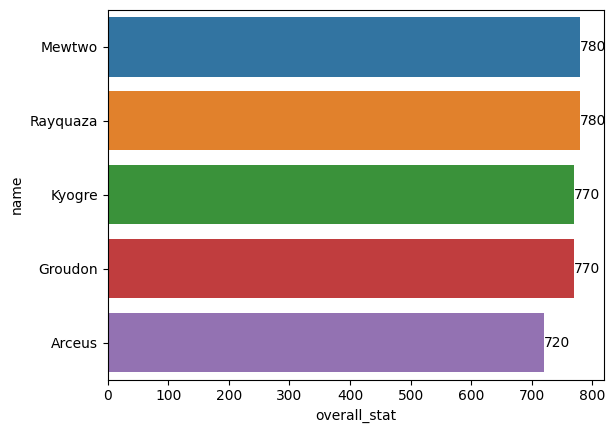

In [57]:
# Mengambil 5 pokemon dengan overall stat tertinggi
top5_pokemon = df.nlargest(5, 'overall_stat')

# Membuat barplot
ax = sns.barplot(x='overall_stat', y='name', data=top5_pokemon)

# Memberikan label untuk menunjukkan overall_statnya
ax.bar_label(ax.containers[0])

# Menampilkan plot
plt.show()

5 pokemon diatas adalah pokemon yang memiliki overall stat tertinggi, Mewtwo dan Rayquaza memiliki overall stats yang sama yaitu 780, disusul oleh Kyogre dan Groudon sebanyak 770 dan terakhir Arceus sebesar 720.

Saya akan membuat visualisasi untuk membandingkan masing-masing base stat pada 5 pokemon tersebut

In [58]:
# Membuat fungsi baru untuk menyimpan keenam base stat kedalam list sesuai dengan index yang diinginkan
def overall(index):
  attack = top5_pokemon.attack.iloc[index]
  defense = top5_pokemon.defense.iloc[index]
  hp = top5_pokemon.hp.iloc[index]
  speed = top5_pokemon.speed.iloc[index]
  sp_attack = top5_pokemon.sp_attack.iloc[index]
  sp_defense = top5_pokemon.sp_defense.iloc[index]
  r = [attack,defense,hp,speed,sp_attack,sp_defense,attack]
  return r

# Membuat fungsi baru untuk menyimpan nama dari pokemon sesuai indexnya
def nama(index):
  nama = top5_pokemon.name.iloc[index]
  return nama

# Label untuk di chartnya
stat = ['Attack','Defense','HP','Speed','Special Attack','Special Defense','Attack']

# Membuat radar chart menggunakan plotly dengan mengisi argumen sesuai dengan fungsi yang sudah dibuat sebelumnya
fig = go.Figure(
    data=[
        go.Scatterpolar(r=overall(0), theta=stat, fill='toself', name=nama(0)),
        go.Scatterpolar(r=overall(1), theta=stat, fill='toself', name=nama(1)),
        go.Scatterpolar(r=overall(2), theta=stat, fill='toself', name=nama(2)),
        go.Scatterpolar(r=overall(3), theta=stat, fill='toself', name=nama(3)),
        go.Scatterpolar(r=overall(4), theta=stat, fill='toself', name=nama(4))
    ],  layout=go.Layout(
        title=go.layout.Title(text='Perbandingan 5 Pokemon dengan Overall Stat Tertinggi'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    ))

# Mengubah ukuran font
fig.update_layout(font=dict(size= 15))

# Menampilkan chart
fig.show()

* Mewtwo memiliki special attack dan speed tertinggi dari 5 pokemon tersebut
* Rayquaza memiliki attack dan special attack yang tinggi
* Kyogre lebih dominan pada special defense
* Groudon lebih dominan pada defense
* Arceus mempunyai stat yang seimbang pada segala aspek

Kembali ke topik awal, saya ingin lihat apakah 5 pokemon diatas termasuk legendary atau bukan

In [59]:
top5_pokemon.is_legendary

306    1
623    1
179    1
221    1
271    1
Name: is_legendary, dtype: int64

Angka 1 mengindikasikan bahwa semua pokemon tersebut termasuk pokemon legendary.

Saya jadi penasaran, apakah ada pokemon non-legendary dengan overall stat yang lebih tinggi dari pokemon legendary

In [60]:
# Memfilter dataframe untuk hanya menyimpan pokemon non legendary
a = df.query('is_legendary == 0')

# Mengambil overall stat tertinggi dari dataframe yang sudah difilter
strongest_non_legend = a.nlargest(1,'overall_stat')

# Menampilkan nama, tipe, overall stat, dan status legendary
strongest_non_legend[['name']+['type1']+['overall_stat']+['is_legendary']]

,name,type1,overall_stat,is_legendary
405,Tyranitar,rock,700,0


In [61]:
# Memfilter dataframe untuk hanya menyimpan pokemon Legendary
a = df.query('is_legendary == 1')

# Mengambil overall stat terendah dari dataframe yang sudah difilter
weakest_legend = a.nsmallest(1,'overall_stat')

# Menampilkan nama, tipe, overall stat, dan status legendary
weakest_legend[['name']+['type1']+['overall_stat']+['is_legendary']]

,name,type1,overall_stat,is_legendary
333,Cosmog,psychic,200,1


Hmm saya tidak menyangka bahwa perbedaannya bisa sangat jauh, _Tyranitar_ merupakan pokemon non-legendary terkuat dengan overall stat 700 sedangkan _Cosmog_ merupakan pokemon legendary terlemah dengan overall stat 200

Setelah melihat data diatas, ternyata ada pokemon non legendary yang jauh lebih kuat dari pokemon legendary, lantas muncul pertanyaan lain. "Apakah overall_stat bukan penentu status legendary pokemon? apakah ada perbedaan overall_stat pokemon legendary dengan pokemon non-legendary?

Untuk menjawab pertanyaan tersebut, saya akan melakukan **uji hipotesis**.

Null Hypothesisnya (H0) claim bahwa tidak ada perbedaan signifikan antara overall stat dari  pokemon legendary dan pokemon non-legendary, dan Hypothesis alternatifnya (H1) menunjukkan adanya perbedaan yang signifikan

H0 : rata-rata overall_stat antara pokemon legendary dan non-legendary adalah sama

H1 : rata-rata overall_stat antara pokemon legendary dan non-legendary tidak sama

In [62]:
# Memfilter dataframe untuk hanya menyimpan pokemon legendary dan non-legendary
legendary = df.query('is_legendary == 1')
ordinary = df.query('is_legendary == 0')

# Mencari mean dari kedua jenis pokemon
legendary_mean = legendary['overall_stat'].mean()
ordinary_mean = ordinary['overall_stat'].mean()

# Mencari standard deviation antara kedua jenis pokemon
legendary_std = legendary['overall_stat'].std()
ordinary_std = ordinary['overall_stat'].std()

# Jumlah pokemon pada data
n_legendary = len(legendary)
n_ordinary = len(ordinary)

# Menghitung t-value
t_value = (legendary_mean - ordinary_mean) / sqrt((legendary_std**2 / n_legendary) + (ordinary_std**2 / n_ordinary))**0.5

# degrees of freedom
defree = n_legendary + n_ordinary - 2

# significance level
alpha = 0.05

# menghitung critical value dari two tailed t-test
critical_value = stats.t.ppf(1 - alpha/2, defree)

# Menghitung p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_value), defree))

# Membandingkan t-value dengan critical valude dan p-value dengan alpha
if abs(t_value) > critical_value or p_value < alpha:
    print("Tolak null hypothesis.")
    print("Ada perbedaan signifikan antara rata-rata dari overall stat Pokemon legendary dan pokemon non-legendary.")
else:
    print("Gagal tolak null hypothesis.")
    print("Tidak ada perbedaan signifikan antara rata-rata dari overall stat Pokemon legendary dan pokemon non-legendary.")

Tolak null hypothesis.
Ada perbedaan signifikan antara rata-rata dari overall stat Pokemon legendary dan pokemon non-legendary.


Dan untuk visualisasinya,

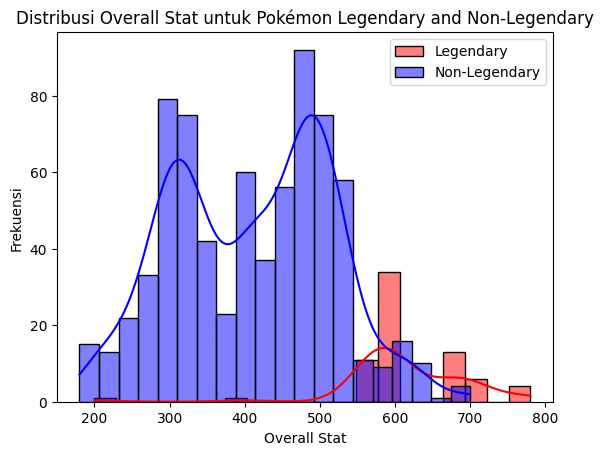

In [63]:
# Membuat plot untuk kedua jenis pokemon
sns.histplot(data=legendary, x='overall_stat', bins=20, kde=True, color='red', label='Legendary')
sns.histplot(data=ordinary, x='overall_stat', bins=20, kde=True, color='blue', label='Non-Legendary')

# Memberi label
plt.xlabel('Overall Stat')
plt.ylabel('Frekuensi')
plt.title('Distribusi Overall Stat untuk Pokémon Legendary and Non-Legendary')
plt.legend()

# Menampilkan plot
plt.show()

Sesuai uji hipotesis diatas, "Ada perbedaan signifikan antara rata-rata dari overall stat Pokemon legendary dan pokemon non-legendary". Artinya clear bahwa pokemon legendary mempunyai overall stat yang berbeda dari pokemon biasa, dan status legendaris artinya merupakan golongan khusus yang berisikan pokemon-pokemon tertentu saja.

Dengan ini, bisa disimpulkan dalam pertandingan pokemon, pokemon legendary akan menjadi pilihan terbaik untuk meminimalisir kekalahan. Namun ada aspek yang harus dipertimbangkan lagi, yaitu capture rate. Saya yakin untuk mendapatkan pokemon legendary bukanlah hal yang mudah, untuk itu saya ingin lihat lagi bagaimana korelasi antara capture rate dengan status legendary pokemon.

In [64]:
# Menghitung korelasi antara capture rate dengan is_legendary
korelasi = df['capture_rate'].corr(df['is_legendary'])

# Menampilkan hasil
print(korelasi)

-0.32767723024167805


-0.32 mengindikasikan rendahnya korelasi negatif diantara kedua variabel, menunjukkan tidak ada kecenderungan yang kuat antara capture rate dengan status legendary. Jika status legendary bukan penentunya maka apa yang menentukan susah atau mudahnya pokemon untuk didapatkan?, **bagaimana dengan korelasi antara capture rate dengan overall statnya?**

In [65]:
# Menghitung korelasi antara capture rate dengan overall stat
korelasi = df['capture_rate'].corr(df['overall_stat'])

# Menampilkan hasil
print(korelasi)

-0.7122750889876264


ketika korelasi koefisien mendekati -1 maka semakin mengindikasikan korelasi negatif, yang artinya ketika 1 variabel meningkat maka variabel lainnya nya akan menurun. Seperti yang terlihat dari output diatas, korelasinya mendekati -1.

Output menunjukkan -0.7076 artinya ada kecenderungan yang kuat bahwa semakin tinggi 'overall_stat', maka 'capture_rate' akan menurun. Atau dengan kata lain, semakin tinggi overall stat maka akan semakin susah pokemon untuk ditangkap, dan vice versa.

## **Conclusion**

Dari berbagai penjabaran diatas, dapat saya simpulkan bahwa pokemon memiliki karakteristik unik masing-masing, banyak aspek yang harus dipertimbangkan untuk menentukan mana pokemon yang terbaik.

Berikut beberapa poin kesimpulan yang bisa saya tarik :
* gunakan pokemon Mewtwo dan Rayquaza karena mereka merupakan pokemon dengan overall base stat tertinggi
* Ada beberapa Pokemon non-legendary yang memiliki overall_stat yang lebih tinggi daripada beberapa Pokemon legendary. Kekuatan relatif sebuah Pokemon tidak hanya ditentukan oleh status legendaris atau non-legendarisnya.
* Menggunakan pokemon dengan tipe _"dragon"_ merupakan pilihan yang bagus karena memiliki overall_stat yang relatif tinggi. dan hindari menggunakan pokemon tipe "bug" karena kebanyakan pokemon tersebut memiliki overall stat yang relatif kecil